In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('C:/Users/lenovo/python_code/house.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,7129300520,2014/10/13,221900,3,1.00,1180,5650,1.0,USA
1,6414100192,2014/10/14,538000,3,2.25,2570,7242,2.0,USA
2,5631500400,2014/10/15,180000,2,1.00,770,10000,1.0,USA
3,2487200875,2014/10/16,604000,4,3.00,1960,5000,1.0,USA
4,1954400510,2014/10/17,510000,3,2.00,1680,8080,1.0,USA
5,7237550310,2014/10/18,1225000,4,4.50,5420,101930,1.0,USA
6,1321400060,2014/10/19,257500,3,2.25,1715,6819,2.0,USA
7,2008000270,2014/10/20,291850,3,1.50,1060,9711,1.0,USA
8,2414600126,2014/10/21,229500,3,1.00,1780,7470,1.0,USA
9,3793500160,2014/10/22,323000,3,2.50,1890,6560,2.0,USA


In [3]:
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")

In [4]:
data['date'].head()

0   2014-10-13
1   2014-10-14
2   2014-10-15
3   2014-10-16
4   2014-10-17
Name: date, dtype: datetime64[ns]

In [5]:
data = data.set_index('date')

In [6]:
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
date,,,,,,,,
2014-10-13,7129300520,221900,3,1.00,1180,5650,1.0,USA
2014-10-14,6414100192,538000,3,2.25,2570,7242,2.0,USA
2014-10-15,5631500400,180000,2,1.00,770,10000,1.0,USA
2014-10-16,2487200875,604000,4,3.00,1960,5000,1.0,USA
2014-10-17,1954400510,510000,3,2.00,1680,8080,1.0,USA
2014-10-18,7237550310,1225000,4,4.50,5420,101930,1.0,USA
2014-10-19,1321400060,257500,3,2.25,1715,6819,2.0,USA
2014-10-20,2008000270,291850,3,1.50,1060,9711,1.0,USA
2014-10-21,2414600126,229500,3,1.00,1780,7470,1.0,USA


In [7]:
ts = data['price']
print(ts.head(30))

date
2014-10-13     221900
2014-10-14     538000
2014-10-15     180000
2014-10-16     604000
2014-10-17     510000
2014-10-18    1225000
2014-10-19     257500
2014-10-20     291850
2014-10-21     229500
2014-10-22     323000
2014-10-23     662500
2014-10-24     468000
2014-10-25     310000
2014-10-26     400000
2014-10-27     530000
2014-10-28     650000
2014-10-29     395000
2014-10-30     485000
2014-10-31     189000
2014-11-01     230000
2014-11-02     385000
2014-11-03    2000000
2014-11-04     285000
2014-11-05     252700
2014-11-06     329000
2014-11-07     233000
2014-11-08     937000
2014-11-09     667000
2014-11-10     438000
2014-11-11     719000
Name: price, dtype: int64


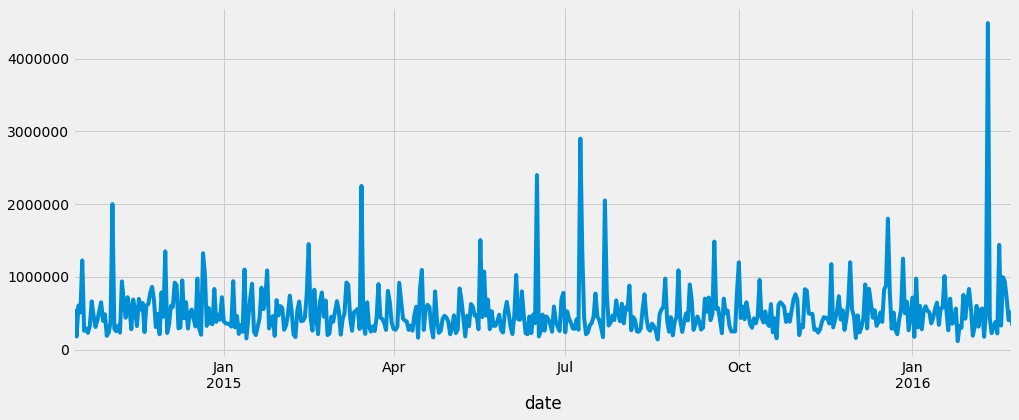

In [8]:
ts.plot(figsize=(15, 6))
plt.show()

In [9]:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
 
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [10]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
 
            results = mod.fit()
 
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [12]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
 
results = mod.fit()
 
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0021      0.114      0.018      0.985      -0.221       0.225
ma.L1         -0.9084      0.056    -16.105      0.000      -1.019      -0.798
ar.S.L12      -0.0364      0.128     -0.285      0.776      -0.287       0.214
ma.S.L12      -0.9430      0.052    -18.032      0.000      -1.045      -0.840
sigma2      3.378e+11   1.17e-13   2.88e+24      0.000    3.38e+11    3.38e+11


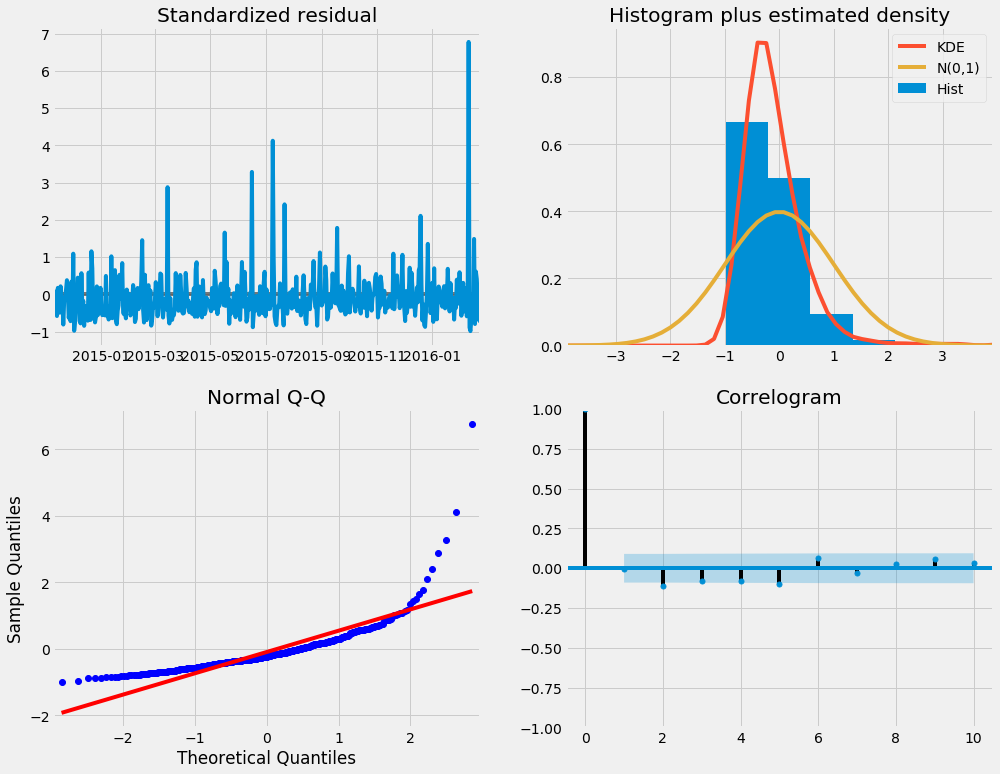

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2015-10-13'), dynamic=False)
pred_ci = pred.conf_int()

In [15]:
ts.head(20)

date
2014-10-13     221900
2014-10-14     538000
2014-10-15     180000
2014-10-16     604000
2014-10-17     510000
2014-10-18    1225000
2014-10-19     257500
2014-10-20     291850
2014-10-21     229500
2014-10-22     323000
2014-10-23     662500
2014-10-24     468000
2014-10-25     310000
2014-10-26     400000
2014-10-27     530000
2014-10-28     650000
2014-10-29     395000
2014-10-30     485000
2014-10-31     189000
2014-11-01     230000
Name: price, dtype: int64

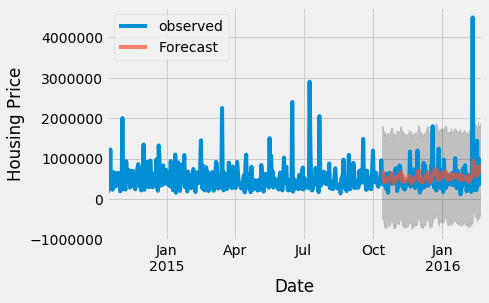

In [16]:
ax = ts['2014-10-13':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
 
ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')
plt.legend()
 
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = ts['2015-10-13':]

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

In [19]:
mse = mean_squared_error(y_forecasted,y_truth)
print(mse)

198756919359.0


In [20]:
rmse = np.sqrt(mse)
print(rmse)

445821.622803


In [21]:
mae = mean_absolute_error(y_forecasted,y_truth)
print(mae)

249697.282386


In [22]:
r2 = r2_score(y_forecasted,y_truth)
print(r2)

-18.2511569982


In [23]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-10-13'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

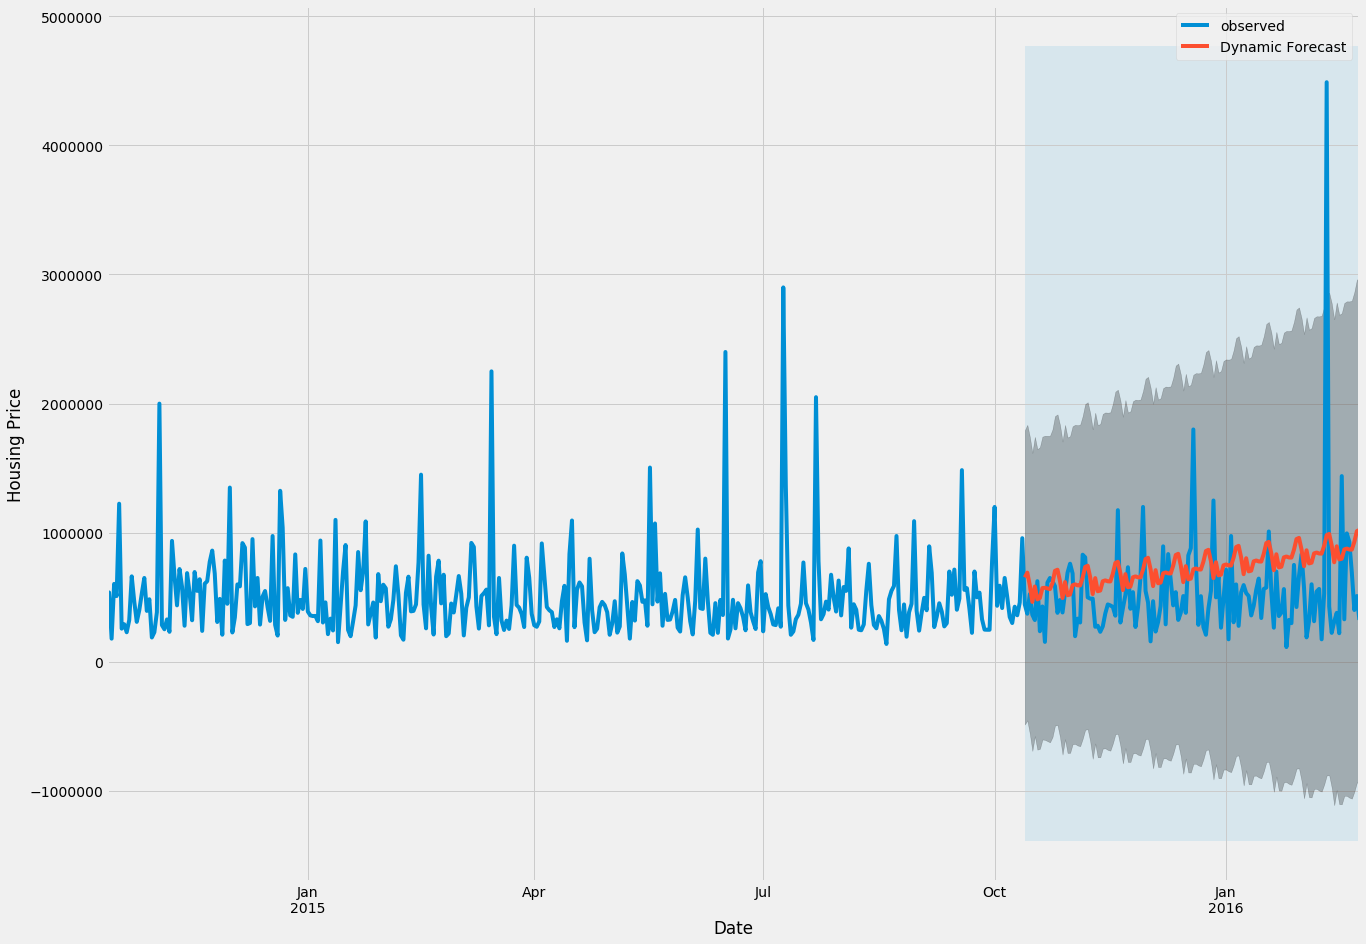

In [25]:
ax = ts['2014-10-13':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
 
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
 
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-10-13'), ts.index[-1],
                 alpha=.1, zorder=-1)
 
ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')
 
plt.legend()
plt.show()

In [26]:
# Extract the predicted and true values of our time-series
y_forecasted = pred_dynamic.predicted_mean
y_truth = ts['2015-10-13':]
 
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 217456786693.46


In [27]:
rmse = np.sqrt(mse)
print(rmse)

466322.620825


In [28]:
mae = mean_absolute_error(y_forecasted,y_truth)
print(mae)

326296.007337


In [29]:
r2 = r2_score(y_forecasted,y_truth)
print(r2)

-13.6454673633


In [30]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)
 
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

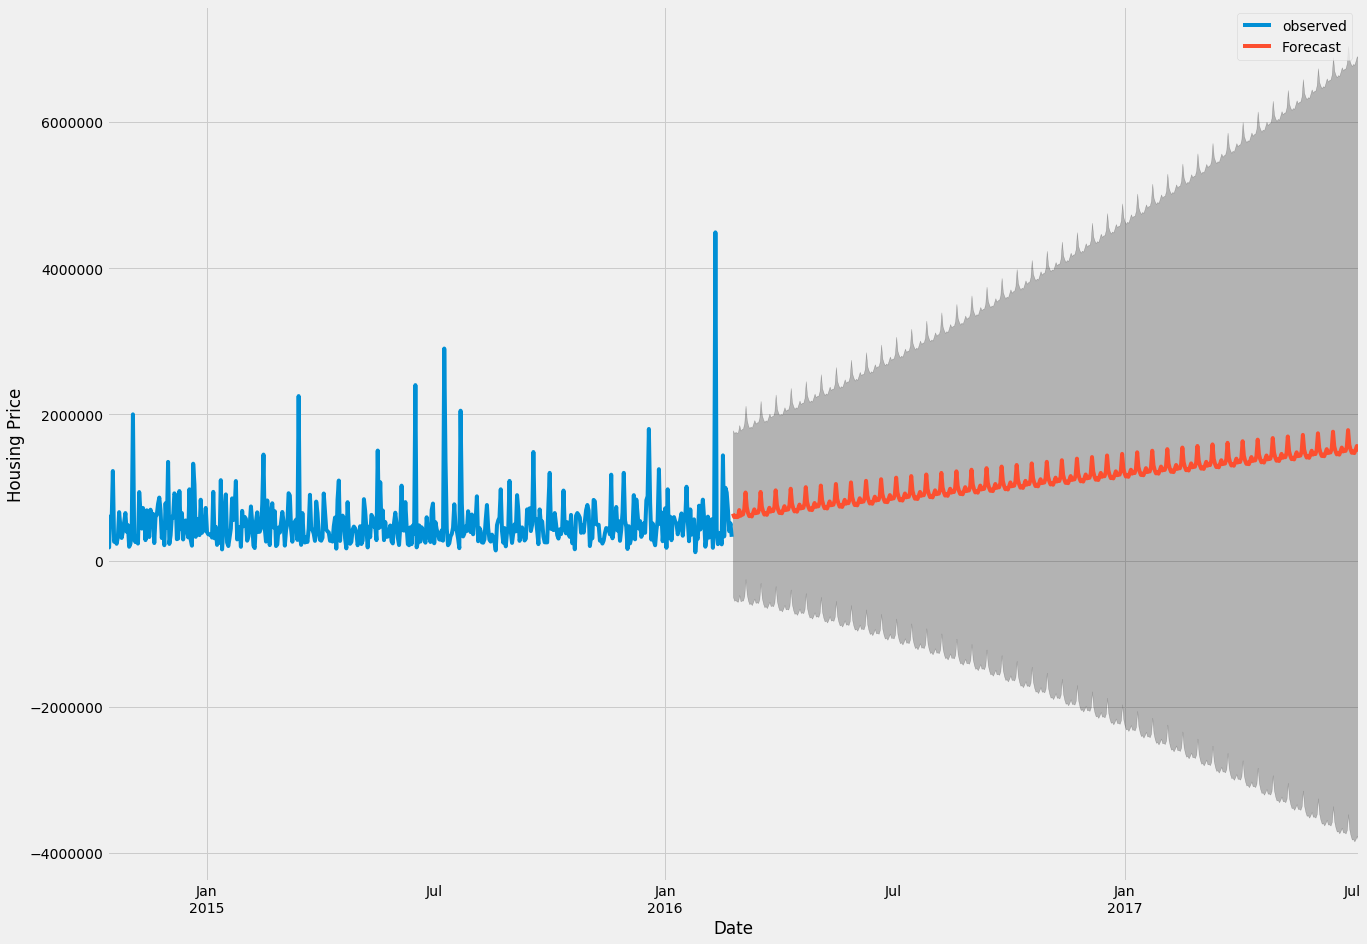

In [31]:
ax = ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')
 
plt.legend()
plt.show()

In [32]:
# Extract the predicted and true values of our time-series
y_forecasted = pred_dynamic.predicted_mean
y_truth = ts['2015-10-13':]
 
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 217456786693.46


In [33]:
rmse = np.sqrt(mse)
print(rmse)

466322.620825


In [34]:
mae = mean_absolute_error(y_forecasted,y_truth)
print(mae)

326296.007337


In [35]:
r2 = r2_score(y_forecasted,y_truth)
print(r2)

-13.6454673633
